# I. Overview

The idea of this project started when I was strugling to sell my brother's old car. There are website such as KBB, EBay, CarGurus that can recommend the sell price, and I thought it was a good idea to build my own model and compare with those sites, first reason is to have some knowledge of how their model was built, and the second is because those sites always have a dealer's version, which basically help dealer to maximize their profit. Of course, since they have massive data and very talented data scientists, my model would not be able to compare to them, but I believe this is a good start for my first end-to-end project.

As always, the project went through 4 steps: data scraping, data wrangling, EDA, and modeling. I tried to get more data but due to financial constraint, the only source of data I was able to get was from Kaggle, which originally scraped from Craiglist.

# II. Data

https://www.kaggle.com/austinreese/craigslist-carstrucks-data

# III. Data Wrangling

In [3]:
vehicle_data.shape

(458213, 25)

The original data has 25 columns and 458213 rows. The data was cleaned by:
- Removing unuseful columns.
- Create the 'age' column to replace the 'Year' so that we will have an integer feature instead of category.
- Remove the outliners of 'age', 'price' and 'odometer'.
- Drop the duplicate rows.

# IV. EDA

As we should know, listing price is determined by various factors, such as age, manufacturer, model, title, exterior, etc.

Using EDA, we can easily spot out the correlation between those factors and listing price. The first thing here is 4 to 9 year-old vehicles are listed the most. This is understandable because car lease usually last about 3 years, and loan about 5-7 years. After that period the car could be put up for sale by the dealer (after lease end) or owner (want to change car).

Vehicle's age also affect the listing price as the car is depreciated every year. Older car will be less value than newer one, unless it is some kind of special car.

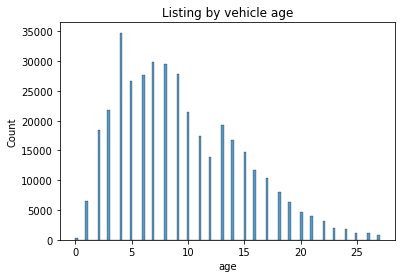

In [94]:
sns.histplot(vehicle_data['age'])
plt.title('Listing by vehicle age');

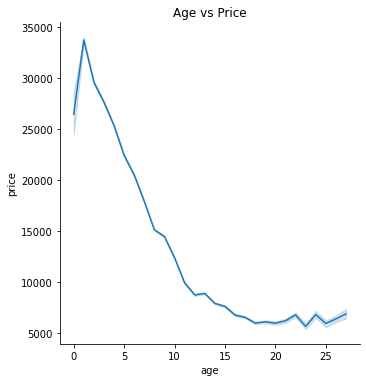

In [98]:
sns.relplot(x='age', y='price', data=vehicle_data, kind='line')
plt.title('Age vs Price');

State also has some affect to the listing price, of course. 

- California has highest number of listing, far above the following such as Florida, Texas, New York. Can we explain this as because California is a capitol of high tech, which they tend to make use of online tool such as Craiglist? 
- Average price for a used car in every state is over \$10,000, many of them are over 15,000. Wyoming, Washington, Montana, and North Dakota leads the average price with about 20,000 but have a lot less listing.

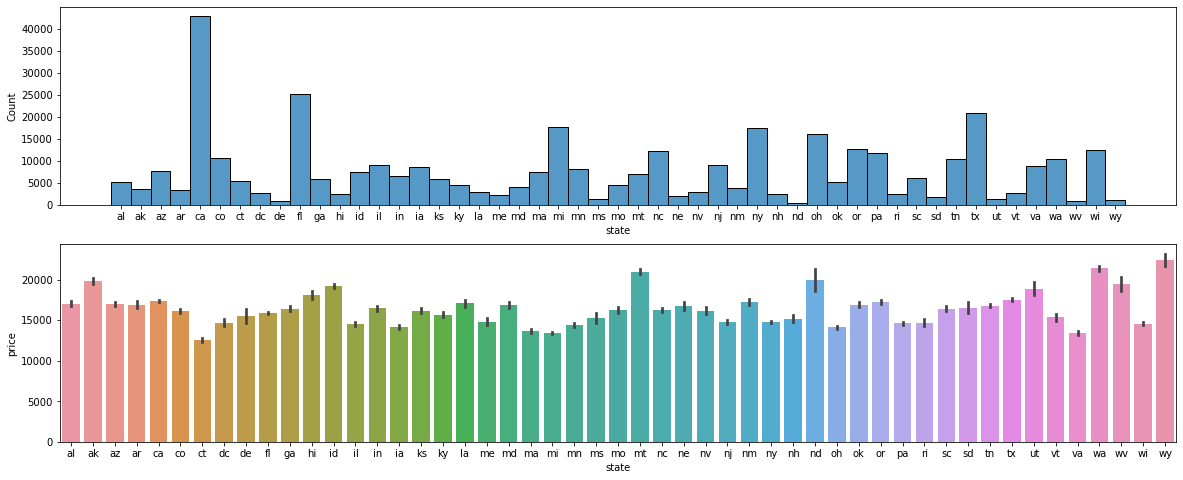

In [11]:
f, axs = plt.subplots(2, 1, figsize=(20, 8))
sns.histplot(vehicle_data['state'], ax=axs[0])
sns.barplot(x='state', y='price', data=vehicle_data, ax=axs[1]);

Manufacturer, to me, is one of the most important feature, as you know, some brand are just more expensive automatically, like Ferrari or Tesla will almost always outpriced a Toyota.

- Ford is the most popular car on Craiglist, follow by Chevrolet, surprisingly. Toyota and Honda are only the third and forth.
- Ferrari has highest average price (well, it's a freaking super car). Tesla, Porsche, Aston-martin are the next ones (and yes they are luxury car). One interesting name here is Hennessey, which is a company that modifies car, not really a car manufacturer. You can find more about them here http://hennesseyperformance.com/about/

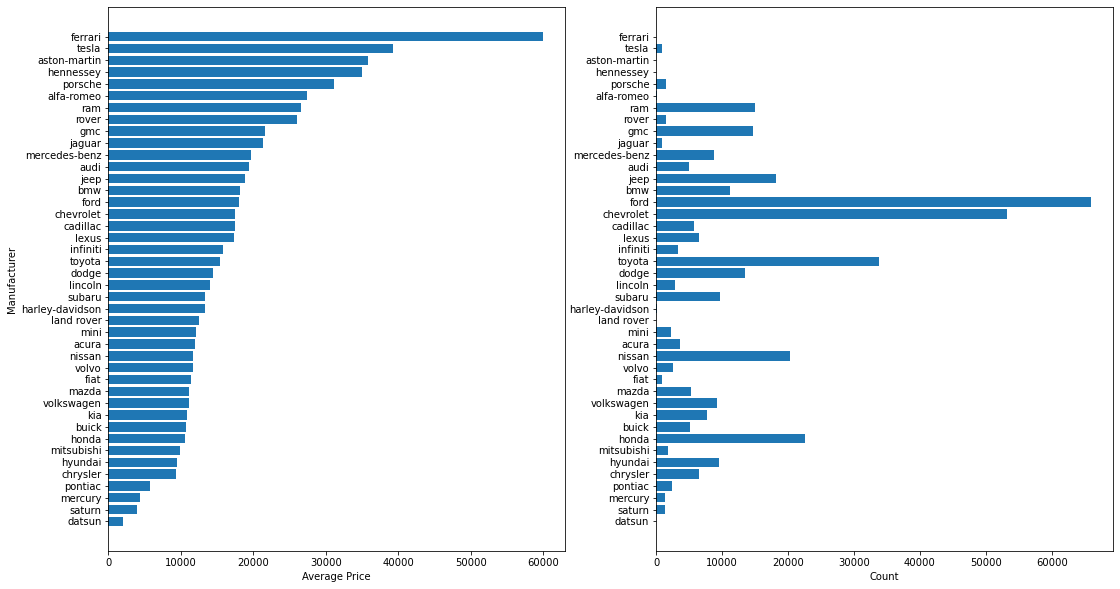

In [13]:
vehicle_by_manufacturer = group_data('manufacturer')
x, y1, y2 = get_xy(vehicle_by_manufacturer, 'manufacturer')
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
axs[0].barh(x, y1)
axs[0].set_xlabel('Average Price')
axs[0].set_ylabel('Manufacturer')
axs[1].barh(x, y2)
axs[1].set_xlabel('Count')
plt.tight_layout;

Other correlation between listing price and 'transmission', 'title status', 'fuel', 'type', 'drive', 'paint_color', 'cylinders', and 'condition' are also showed clearly in the EDA.

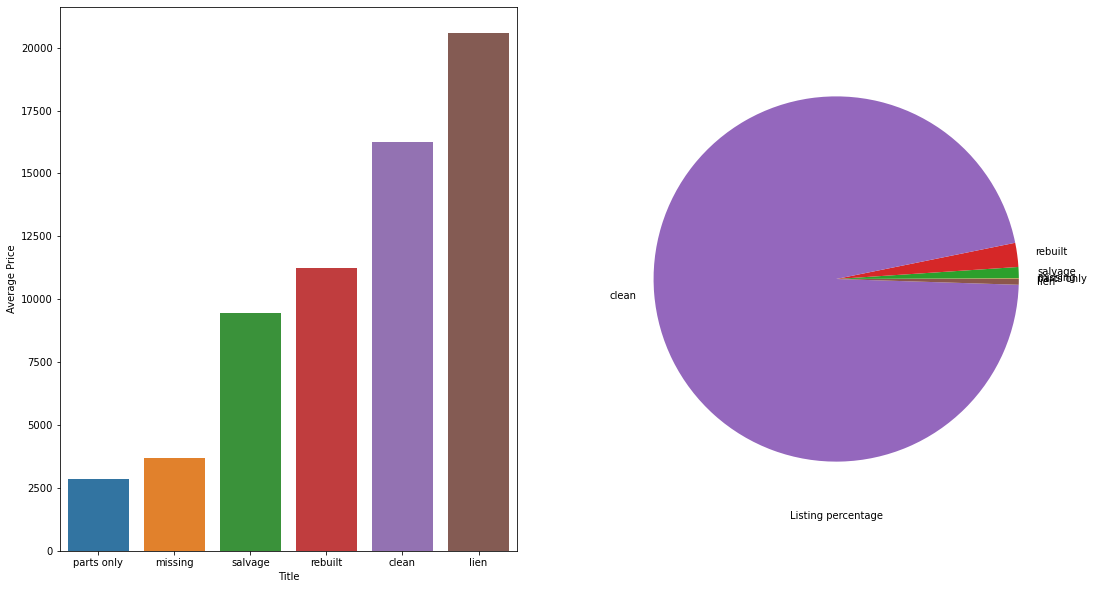

In [16]:
#Group by title
vehicle_by_title = group_data('title_status')
#Draw
x, y1, y2 = get_xy(vehicle_by_title, 'title_status')
fig, axs = plt.subplots(1, 2, figsize=(18,10))
sns.barplot(x='title_status', y='avg_price', data=vehicle_by_title, ax=axs[0])
axs[0].set_xlabel('Title')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

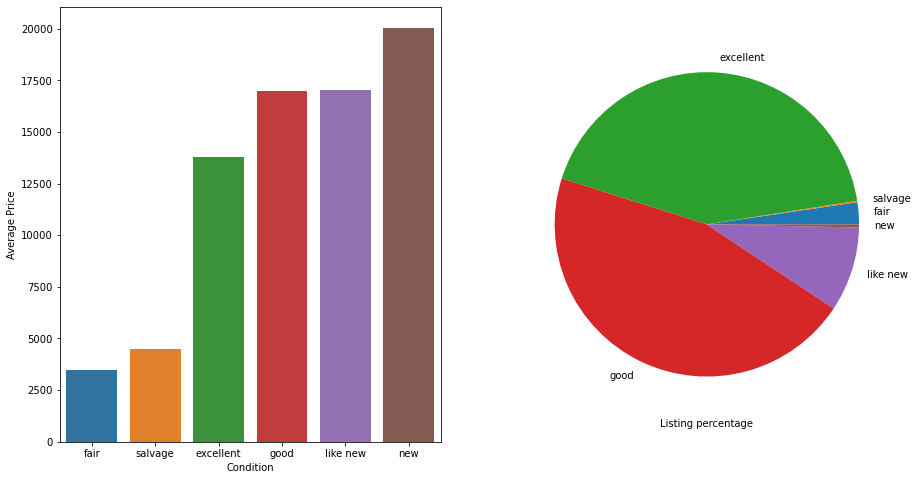

In [17]:
#Group by condition
vehicle_by_condition = group_data('condition')
#Draw
x, y1, y2 = get_xy(vehicle_by_condition, 'condition')
fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='condition', y='avg_price', data=vehicle_by_condition, ax=axs[0])
axs[0].set_xlabel('Condition')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

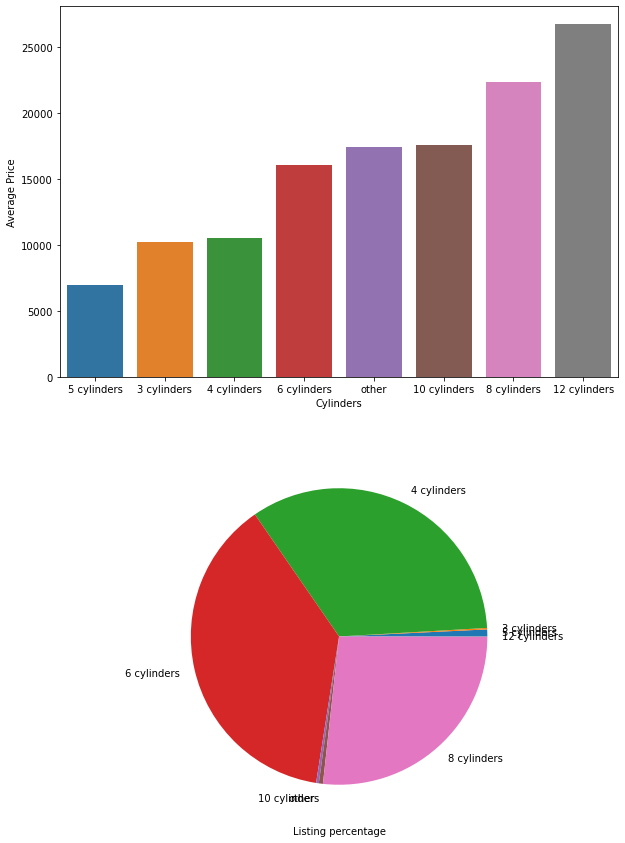

In [18]:
#Group by cylinders
vehicle_by_cylinders = group_data('cylinders')
#Draw
x, y1, y2 = get_xy(vehicle_by_cylinders, 'cylinders')
fig, axs = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='cylinders', y='avg_price', data=vehicle_by_cylinders, ax=axs[0])
axs[0].set_xlabel('Cylinders')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

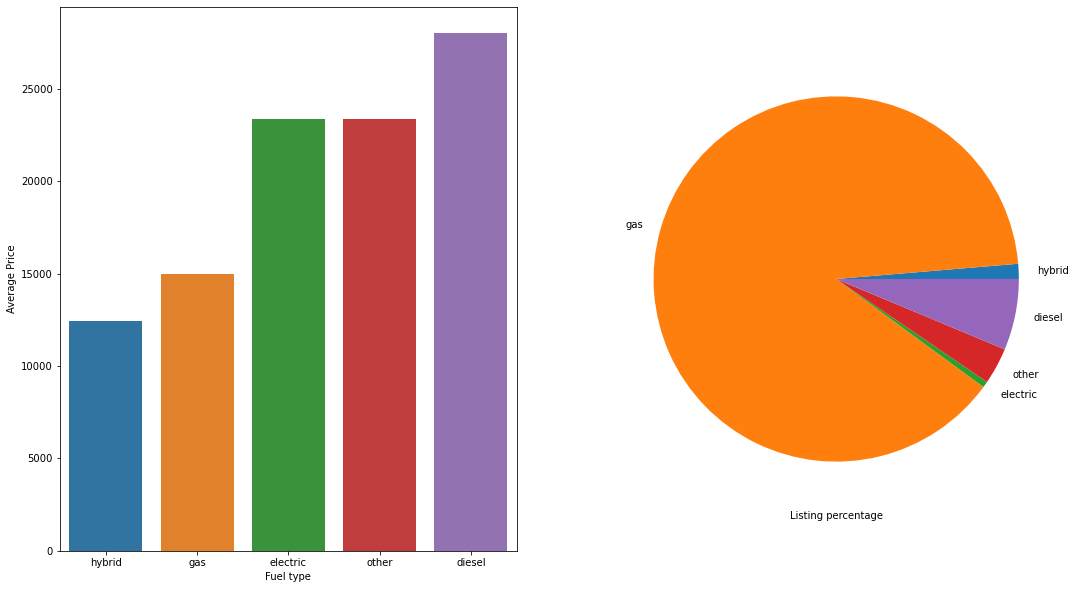

In [19]:
#Group by fuel
vehicle_by_fuel = group_data('fuel')
#Draw
x, y1, y2 = get_xy(vehicle_by_fuel, 'fuel')
fig, axs = plt.subplots(1, 2, figsize=(18,10))
sns.barplot(x='fuel', y='avg_price', data=vehicle_by_fuel, ax=axs[0])
axs[0].set_xlabel('Fuel type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

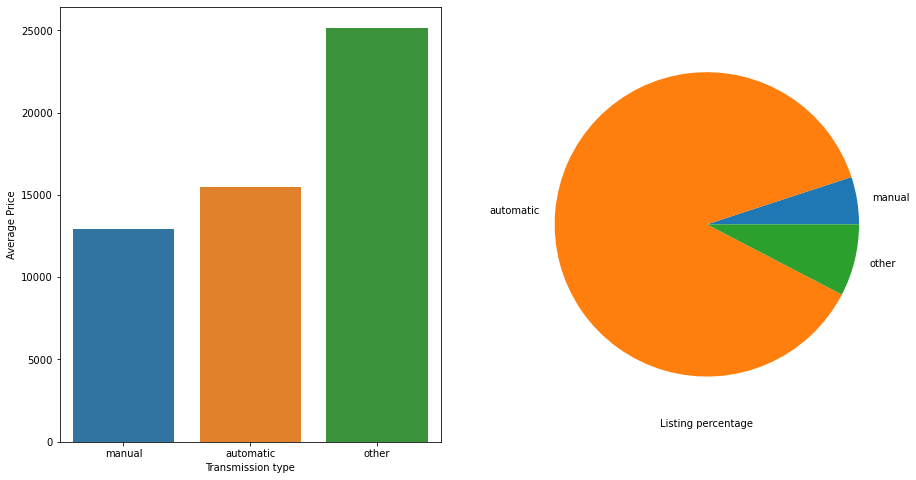

In [20]:
#Group by transmission
vehicle_by_transmission = group_data('transmission')
#Draw
x, y1, y2 = get_xy(vehicle_by_transmission, 'transmission')
fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='transmission', y='avg_price', data=vehicle_by_transmission, ax=axs[0])
axs[0].set_xlabel('Transmission type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

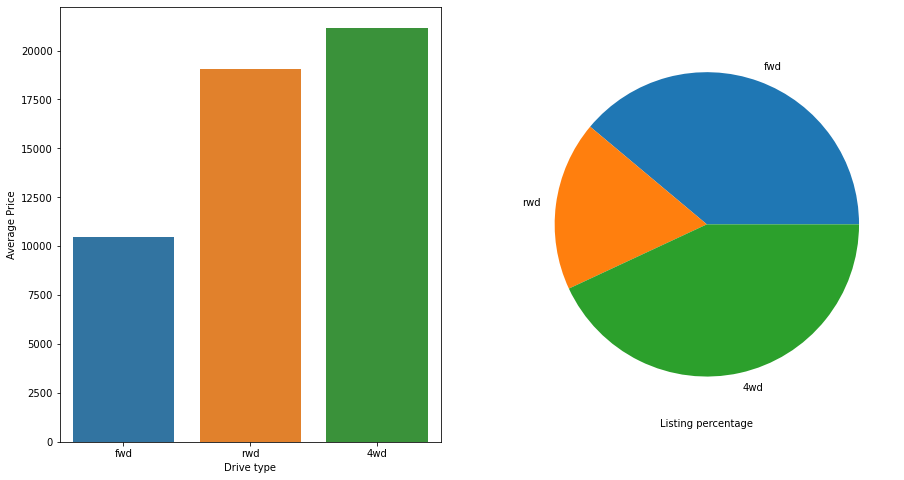

In [21]:
#Group by drive
vehicle_by_drive = group_data('drive')
#Draw
x, y1, y2 = get_xy(vehicle_by_drive, 'drive')
fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(x='drive', y='avg_price', data=vehicle_by_drive, ax=axs[0])
axs[0].set_xlabel('Drive type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

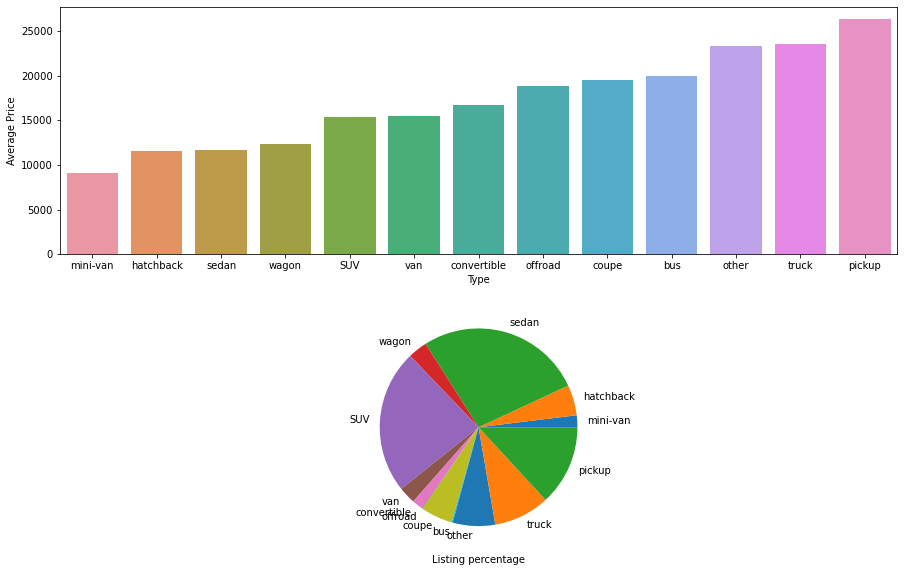

In [22]:
#Group by type
vehicle_by_type = group_data('type')
#Draw
x, y1, y2 = get_xy(vehicle_by_type, 'type')
fig, axs = plt.subplots(2, 1, figsize=(15,10))
sns.barplot(x='type', y='avg_price', data=vehicle_by_type, ax=axs[0])
axs[0].set_xlabel('Type')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

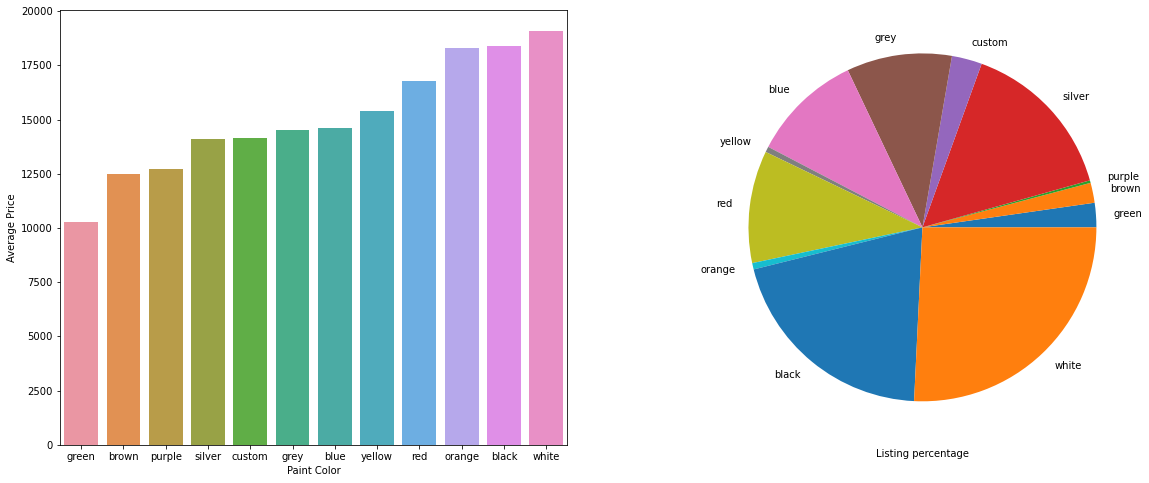

In [23]:
#Group by paint color
vehicle_by_paint = group_data('paint_color')
#Draw
x, y1, y2 = get_xy(vehicle_by_paint, 'paint_color')
fig, axs = plt.subplots(1, 2, figsize=(20,8))
sns.barplot(x='paint_color', y='avg_price', data=vehicle_by_paint, ax=axs[0])
axs[0].set_xlabel('Paint Color')
axs[0].set_ylabel('Average Price')
axs[1].pie(y2, labels=x)
axs[1].set_xlabel('Listing percentage')
plt.tight_layout;

The final clean up was done at this step:
- The price was changed to log_price due to long right tail.
- All the missing variables in the categorical columns were filled with 'other'.
- All the missing variables in the numerical columns were filled with mean.
- In the 'model' column, all the rows with model name that included ', /\ |' are removed.

# V. Modeling

Before training data and building model, all the categorical values have to be changed to numerical. We have 2 ways to do this: using dummy_variable or using LabelEncoder. Dummy_variable usually give us a better performance, unfortunately, due to hardware contraint since the 'model' column has over 100,000 different names, I need to use LabelEncoder, which actually not bad.

The model was built with three different regression algorithms:
- XGBoost
- Ridge Regression
- Linear Regression

In all three models, the data was splited to train and test set with 70-30 split. All three model was using CrossValidation to verify the results. With Ridge Regression and Linear Regression, the data was also scaled using StandardScaler.

All three models also went through GridSearchCV/RandomizedSearchCV to find the best params/k-fold.

In the end, XGBoost out performed Ridge Regression and Linear Regression with mean absolute error of 0.174 vs 0.416, and r2 score of 0.89 vs 0.58

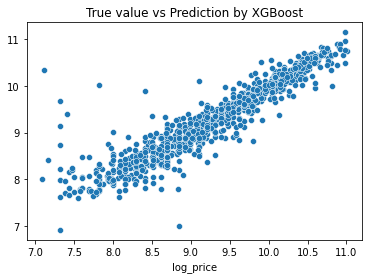

In [146]:
sns.scatterplot(x=y_test[:1000], y=y_pred_xgb[:1000])
plt.title('True value vs Prediction by XGBoost');

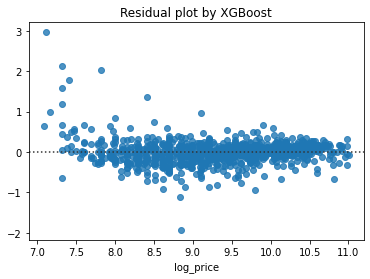

In [149]:
sns.residplot(x=y_test[:1000], y=y_pred_xgb[:1000])
plt.title('Residual plot by XGBoost');

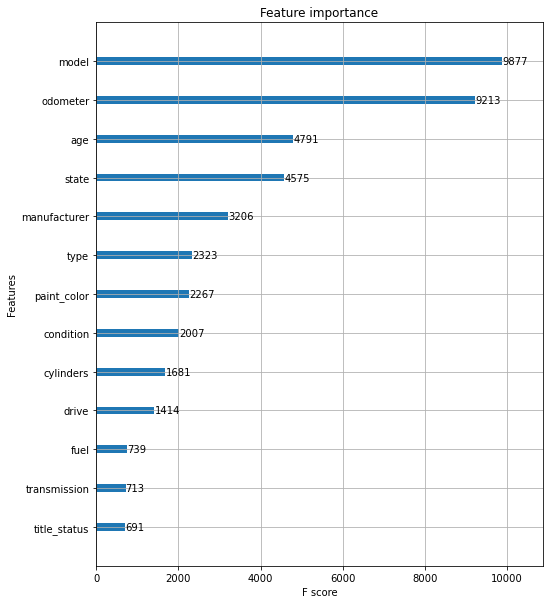

In [114]:
ax = xgb.plot_importance(xgb_model)
fig = ax.figure
fig.set_size_inches(8, 10)

Car model and odometer are the top most important factors that affect the listing price. One surprised is that title status is actually the least important, even though I thought this should be the most important. I think this is due to the data we have is for listing price, not sold price, so title status probably reduces a lot of view which eventually drive down the price at the end.

Finally, I created a test data, which is my car that I was trying to sell, a 2013 Toyota Prius C 3, rebuilt title, good condition with about 30000 mileage. The recommended listing price was over \$12,000. KBB gives me the price range about 6000 - 11000. This is close, but again, this is only the listing price and the model did not have that much data as KBB has.